# Mall Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pyodbc
from sklearn.cluster import KMeans, AffinityPropagation
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

In [2]:
conn = pyodbc.connect("Driver={SQL Server};"
                     "Server=NBLOE15BPGN\SQLEXPRESS;"
                     "Database=Bank_Marketing;"
                     "Trusted_Connection=yes;")
cursor = conn.cursor()
cursor.execute(" SELECT * FROM [Mall_Customers].[dbo].[Mall_Customers]")

In [4]:
data = pd.read_sql(" SELECT * FROM [Mall_Customers].[dbo].[Mall_Customers]",conn)

In [5]:
data.isnull().sum()/len(data)*100

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data['Gender'].value_counts().iplot(kind='bar')

In [10]:
# look at customers age groups

age = data['Age'].values

category = []
for i in age:
    if i >=18 and i <=30:
        category.append("19-30 years")
    elif i>=31 and i<=42:
        category.append("31-42 years")
    elif i>=43 and i<=54:
        category.append("43-54 years")
    elif i>=55 and i<=66:
        category.append("55-66 years")
    else:
        category.append("66+ years")

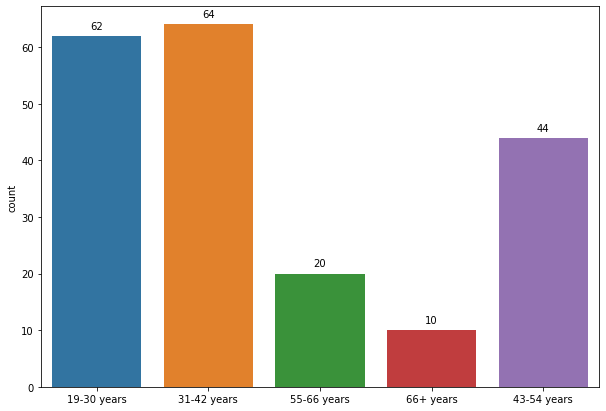

In [11]:
plt.figure(figsize=(10, 7))
plot = sns.countplot(category)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [12]:
# Most of the mall customers are between 19 and 42 years of age.

# Bivariate analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

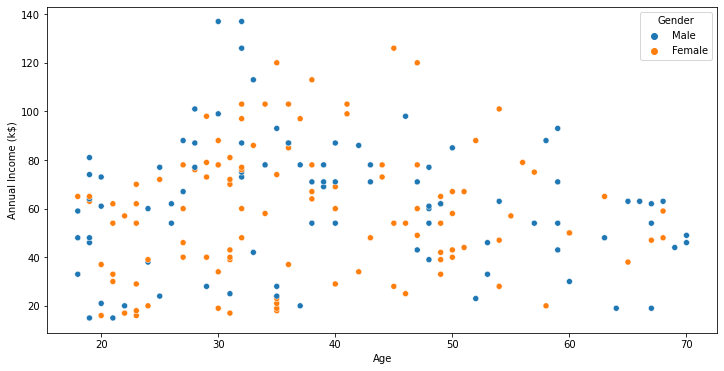

In [13]:
# Look at the scatterplot for numeric variables by selected categorical variable

plt.figure(figsize=(12,6))
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=data)

In [14]:
# No significant difference between males and females in terms of annual income and age
# The middle age people tend to have higher annual income than young and elderly people

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

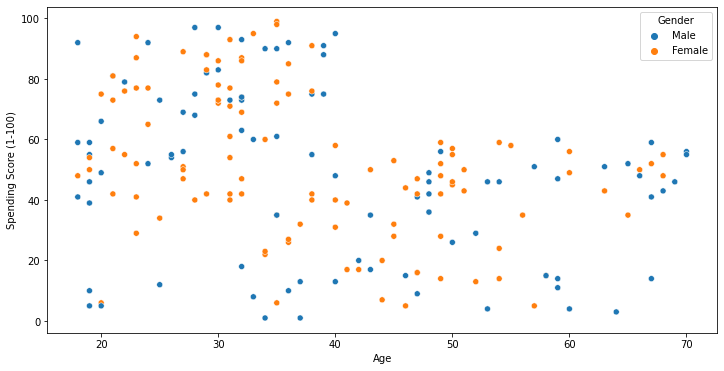

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Age",y="Spending Score (1-100)",hue="Gender",data=data)

In [19]:
# No significant difference between males and females in terms of age
# But it's clear that young people to have higher spending scores than elderly people
# This makes sense as we've seen from the previous plot that middle aged people tend to have higher income than elderly
# it could be elders are cautious when spending or they just don't have high income to spend

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

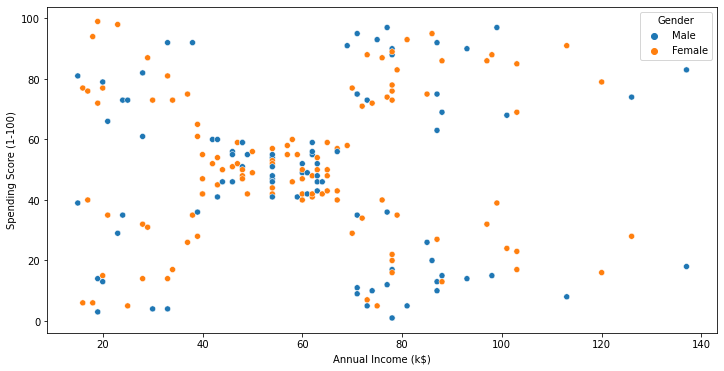

In [20]:
# let's see annual income vs. spending score

plt.figure(figsize=(12,6))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",hue="Gender",data=data)

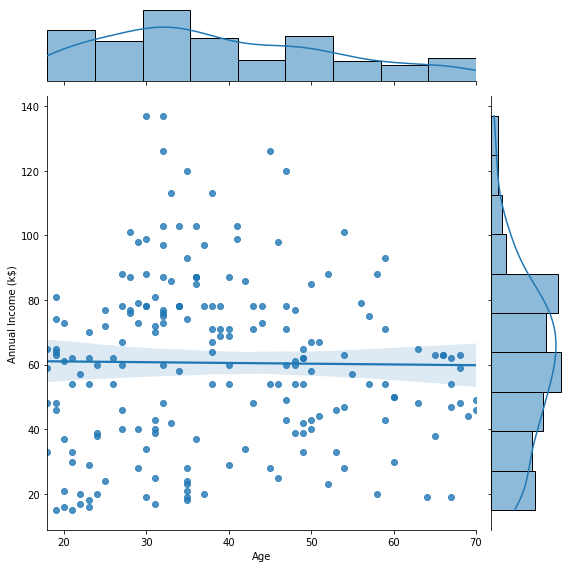

In [22]:
sns.jointplot(x='Age',y='Annual Income (k$)',data=data, kind='reg',height=8)

In [25]:
stats.pearsonr(data['Age'],data['Annual Income (k$)'])

(-0.012398042736060155, 0.8616748930180701)

In [26]:
# No correlation between Age and Annual income

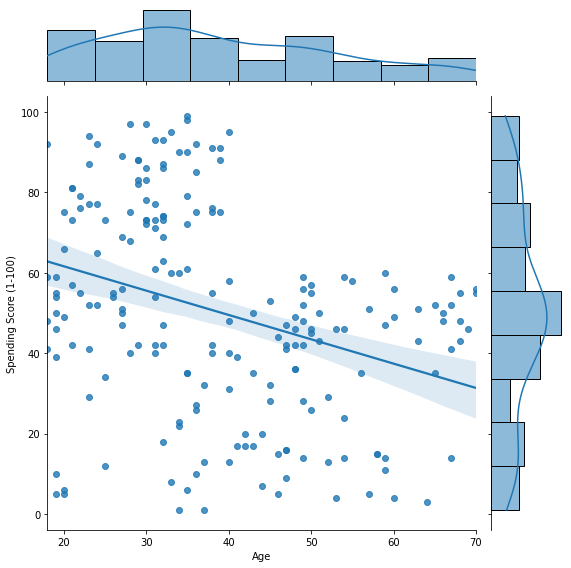

In [27]:
sns.jointplot(x='Age',y='Spending Score (1-100)',data=data, kind='reg',height=8)

In [28]:
stats.pearsonr(data['Age'],data['Spending Score (1-100)'])

(-0.32722684603909, 2.2502957035653357e-06)

In [29]:
# There is a linear negative correlation (Pearson=-0.32) between Age and Spending socre.
# Meaning the young people tend to spend more than the elders

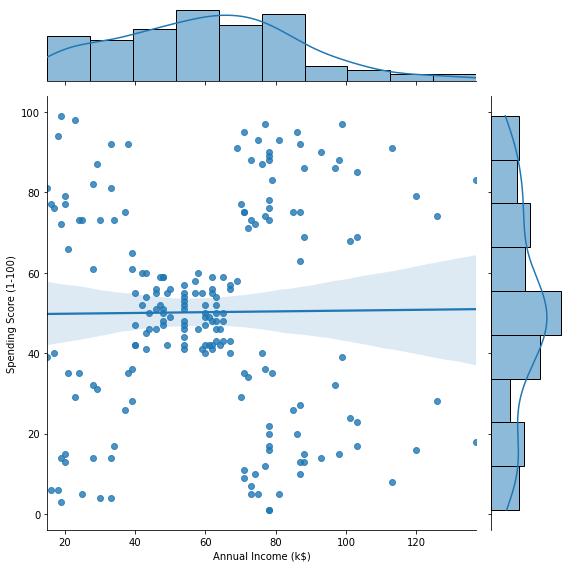

In [30]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data, kind='reg',height=8)

In [31]:
stats.pearsonr(data['Annual Income (k$)'],data['Spending Score (1-100)'])

(0.009902848094037603, 0.8893134370274359)

In [ ]:
# No clear correlation between Annual income and spending score (Pearson=0.009)

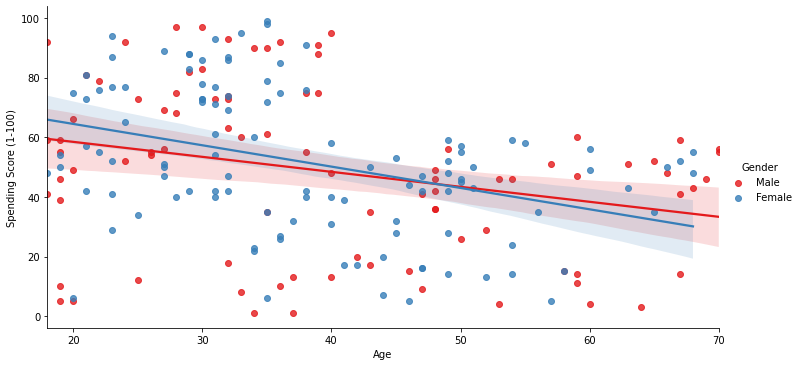

In [32]:
# Let's look at regression plots for various categories

sns.lmplot(x='Age',y='Spending Score (1-100)',hue='Gender',data=data, palette='Set1',aspect=2)

In [ ]:
# The plot above indicates that there is no significant difference between men and women.

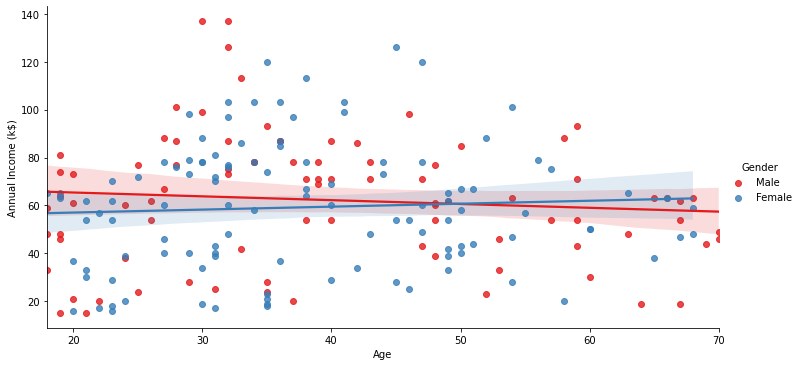

In [33]:
sns.lmplot(x='Age',y='Annual Income (k$)',hue='Gender',data=data, palette='Set1',aspect=2)

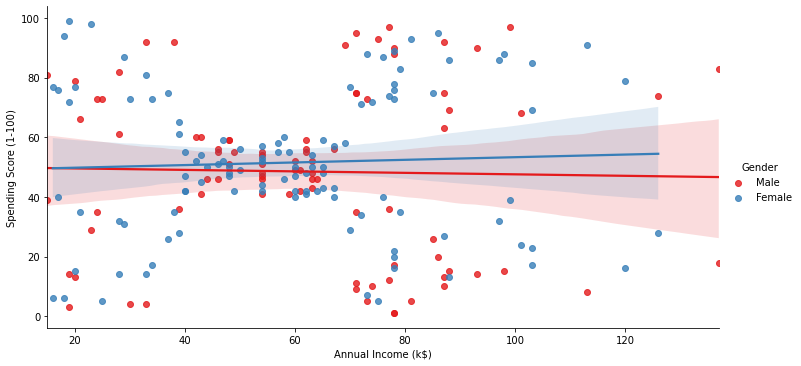

In [34]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',data=data, palette='Set1',aspect=2)

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

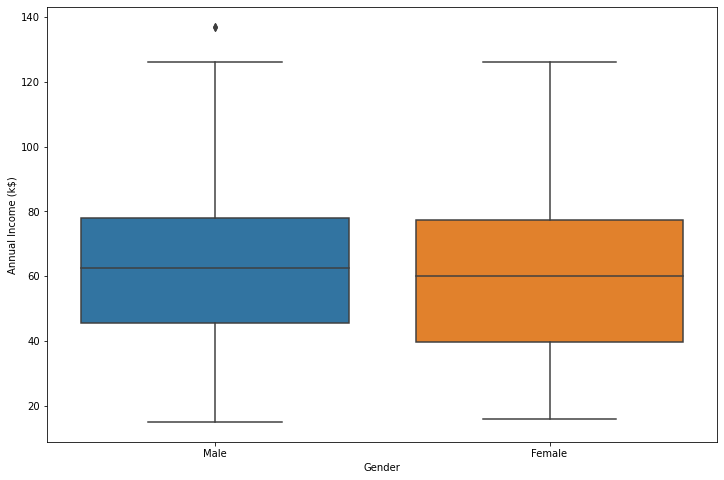

In [35]:
# boxplots for detailed analysis of categorical variables.
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Annual Income (k$)', data=data)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

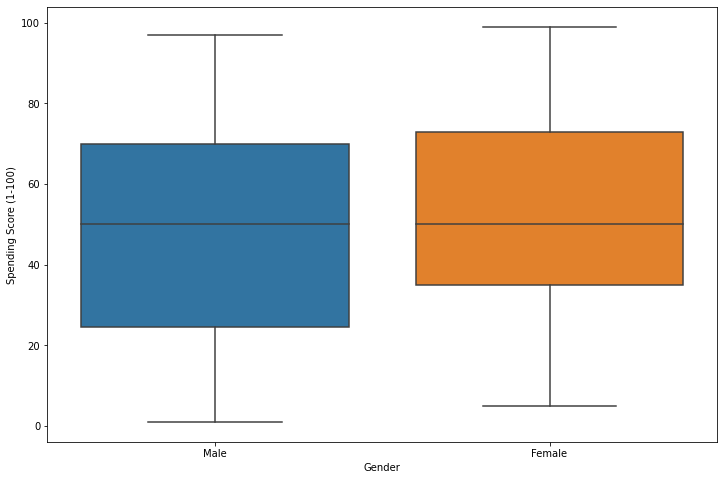

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Spending Score (1-100)', data=data)

In [37]:
# The above plots also confirm that there is no significant difference between men and women in terms
# of annual income and spending score

In [38]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


# Clustering

In [6]:
#Selecting columns/variables for clusterisation with k-means

cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
cluster_data = data.loc[:,cols]

In [6]:
# create a fucntion for plotting distributions for these variables

def distributions(df):   
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Annual Income (k$)"], ax=ax2)
    sns.distplot(df["Spending Score (1-100)"], ax=ax3)
    plt.tight_layout()

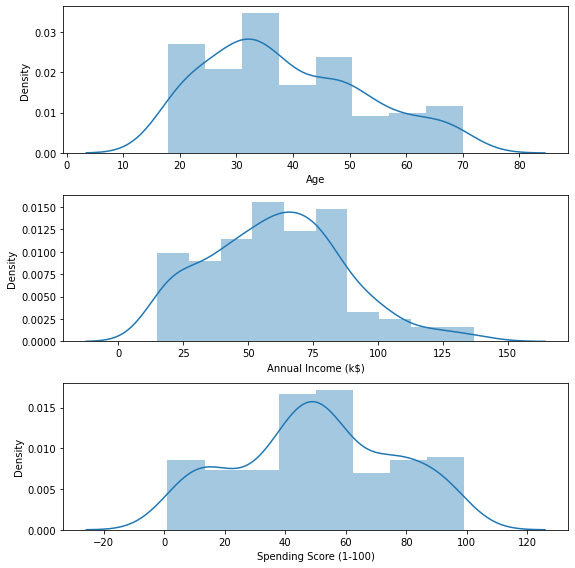

In [7]:
distributions(cluster_data)

In [43]:
cluster_data.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [46]:
# The data doesn't need to be transformed

In [47]:
# The next step will be centering and scaling of variables – it is required by KMeans algorithm. 
# We will use for that a StandardScaler from sklearn library.

In [7]:
sc = StandardScaler()
cluster_scaled = sc.fit_transform(cluster_data)

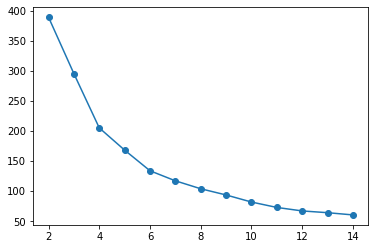

In [8]:
# Check how inertia changes for various number of clusters

# Inertia is the sum of squared error for each cluster.  
  #Therefore the smaller the inertia the denser the cluster(closer together all the points are)

cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in cluster_range:
    kmeans = KMeans(n_clusters = c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(cluster_range,inertias, marker='o')

In [9]:
# The plot above shows that inertia decreases with increasing number of clusters.

# This method allows for assessment of cluster separations and fitting of each observation in its own cluster. 
# The highest score the better. 

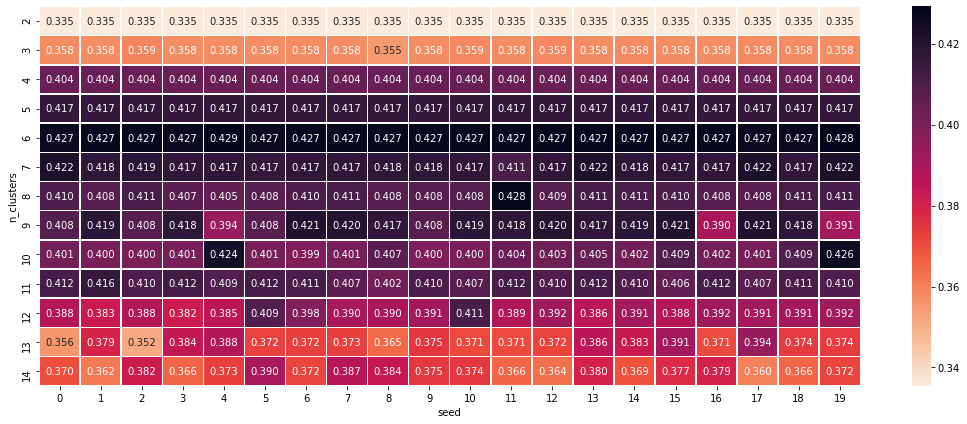

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in cluster_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [11]:
# The heatmap above shows silhouette scores for various combinations of random state and number of clusters.
# The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

# The whole purpose of this was to find a number of clusters with the highest silhouette score 
# Let's choose 6 clusters to get more insight into data

In [12]:
kmeans_sel = KMeans(n_clusters = 6, random_state = 1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [13]:
# Below we create a silhouette graph for 3 clusters in order to visually 
# depict fit of each point within its own cluster.

For n_clusters = 6  and seed = 19 
The average silhouette_score is : 0.42742814991580175


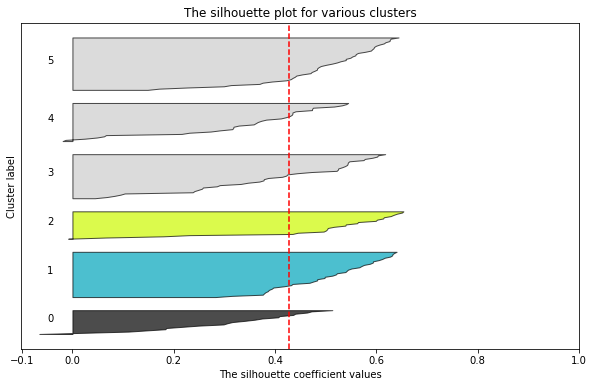

In [14]:
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=6, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 6," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(6):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, 
                      facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

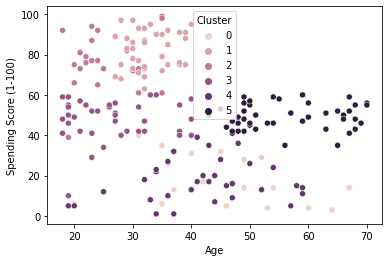

In [60]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',hue='Cluster',data=clustered_data)

In [61]:
# Heatmap plot for easier business interpretation of customer segmentation.

grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45.5,26.3,19.4
1,32.7,86.5,82.1
2,25.2,25.8,76.9
3,26.7,57.6,47.8
4,41.9,88.9,17.0
5,56.3,54.3,49.1


In [62]:
# Cluster 0 – Older customers, lower mean of annual income, lower spending score

# Cluster 1 – middle aged customers, higher mean annual income, higher spending score

# Cluster 2 - younger customers, lower mean annual income, higher spending score

# Cluster 3 - younger customers, lower mean annual income, lower spending score


# etc....

In [15]:
X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

In [16]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [17]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

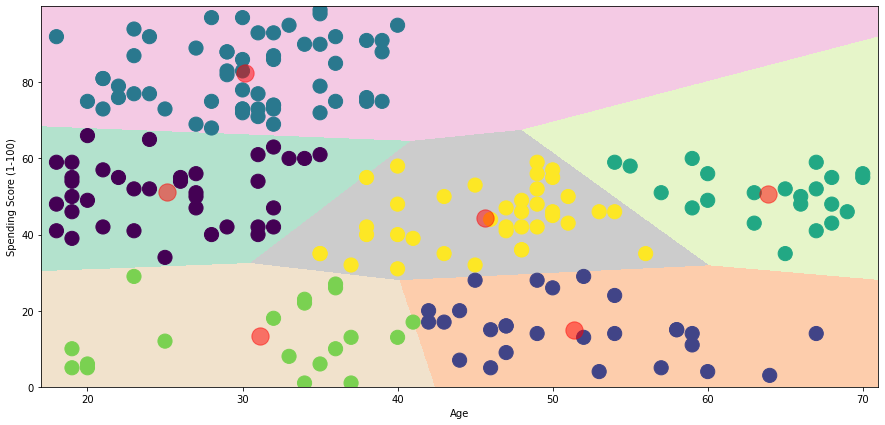

In [18]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [21]:
X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [25]:
algorithm2 = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm2.fit(X2)
labels2 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [26]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm2.predict(np.c_[xx.ravel(), yy.ravel()])

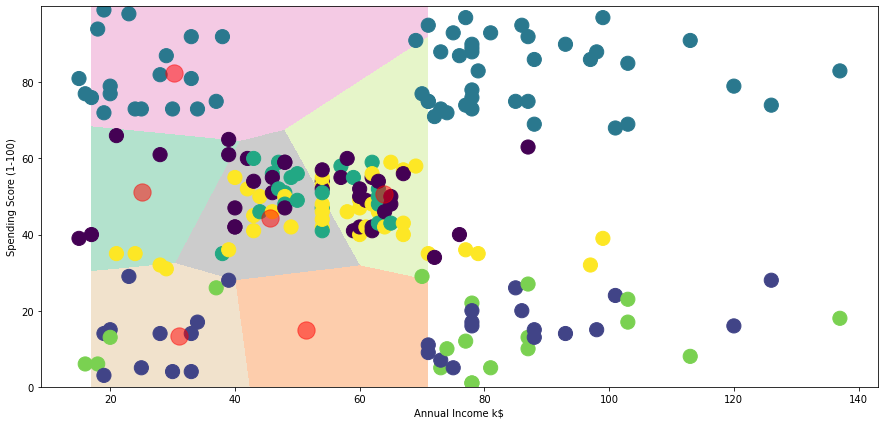

In [27]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income k$')
plt.show()

# Visualising the clusters

In [28]:
# The cluster with high income and high Spending score can be called as Target group
# similarly the cluster with high income but low spending score can be called as Careful group
# and the cluster with low income and high spending score can be called as Careless group
# and cluster with low income and low spending score can be called as Sensible group
# and one that is in the middle is Standard group.

### How this will help?


In [29]:
# For new promotional offer, instead of calling each customer, first we will focus on "Target" group of customers.

# Different types of promotional offers will we suited for different group of customers:-
   # For example a sense of competition to win a prize will be suited for one type of 
   # cluster while, buy one and get one free will be suited for another group of customers.

# Based on each cluster of customer we can choose different strategy of promotion.